# Pymaceuticals Inc.
---

### Analysis

 

In [156]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# from scipy.stats import se
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(study_results,mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [157]:
# Checking the number of mice.
mouse_count = mouse_study_data["Mouse ID"].unique()
mouse_count = len(mouse_count)
mouse_count

249

In [158]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [159]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = mouse_study_data.loc[mouse_study_data["Mouse ID"] == 'g989']
duplicated_df.head()
                                     

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [160]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
index_ids = mouse_study_data[mouse_study_data["Mouse ID"] == 'g989'].index
mouse_study_clean = mouse_study_data.drop(index_ids)
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [161]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = mouse_study_clean["Mouse ID"].unique()
mouse_count_clean = len(mouse_count_clean)
mouse_count_clean

248

## Summary Statistics

In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



#tumor_volume = mouse_study_clean["Tumor Volume (mm3)"]
mean_volume = mouse_study_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_volume = mouse_study_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_volume = mouse_study_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sd_volume = mouse_study_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_volume = mouse_study_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_data = pd.DataFrame({"Mean Tumor Volume": mean_volume,
                          "Median Tumor Volume": median_volume,
                          "Tumor Volume Variance": var_volume,
                          "Tumor Volume Std. Dev.": sd_volume,
                          "Tumor Volume Std. Err.": sem_volume})

tumor_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_data = pd.DataFrame({"mean": mean_volume,
                          "median": median_volume,
                          "var": var_volume,
                          "std": sd_volume,
                          "sem": sem_volume})


# Using the aggregation method, produce the same summary statistics in a single line.
tumor_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


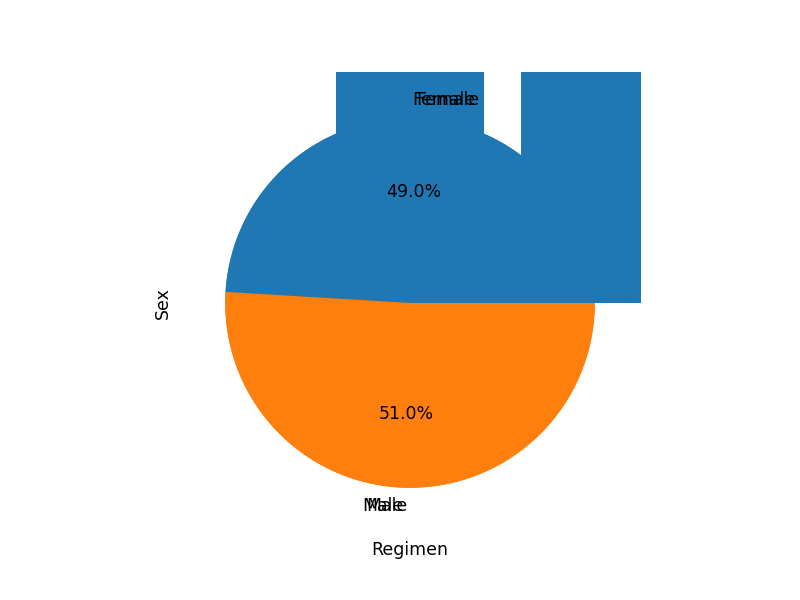

Text(0, 0.5, 'Number of Timepoints')

In [164]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = mouse_study_clean["Drug Regimen"].value_counts()
# regiment_counts = drug_regimen['Timepoint'].count()

bar = drug_regimen.plot(kind="bar")
bar.set_xlabel('Regimen')
bar.set_ylabel('Number of Timepoints')

In [165]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen.index

plt.bar(drug_regimen.index, drug_regimen)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_clean.groupby(['Sex'])['Mouse ID'].nunique().plot(kind='pie')

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = mouse_study_clean.groupby('Sex')
mouse_counts = mouse_sex['Sex'].count()

pie = mouse_counts.plot(kind="pie",autopct="%1.1f%%" )

## Quartiles, Outliers and Boxplots

In [168]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_study_clean.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_volume = pd.merge(max_timepoint, mouse_study_clean, on=["Mouse ID", "Timepoint"], how="left")
max_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [169]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = max_volume.loc[max_volume['Drug Regimen'] == treatment, "Tumor Volume (mm3)"]
                                
    
    # add subset 
    tumor_vol_data.append(tumor_volume)  
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{treatment}: Values below {lower_bound} or above {upper_bound} could be outliers.")
    

Capomulin: Values below 20.70456164999999 or above 51.83201549 could be outliers.
Ramicane: Values below 17.912664470000003 or above 54.30681135 could be outliers.
Infubinol: Values below 36.83290494999999 or above 82.74144559000001 could be outliers.
Ceftamin: Values below 25.355449580000002 or above 87.66645829999999 could be outliers.


<IPython.core.display.Javascript object>


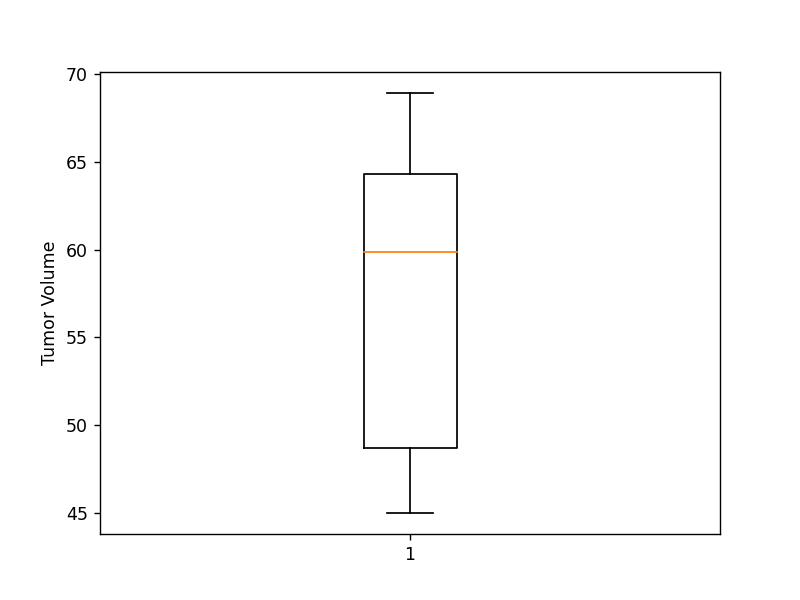

{'whiskers': [<matplotlib.lines.Line2D at 0x196b8fd6b88>,
 'caps': [<matplotlib.lines.Line2D at 0x196b9e3ba08>,
 'boxes': [<matplotlib.lines.Line2D at 0x196b9e398c8>],
 'medians': [<matplotlib.lines.Line2D at 0x196b9e3bc88>],
 'fliers': [<matplotlib.lines.Line2D at 0x196b9e43b08>],
 'means': []}

In [170]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_volume)


## Line and Scatter Plots

<IPython.core.display.Javascript object>


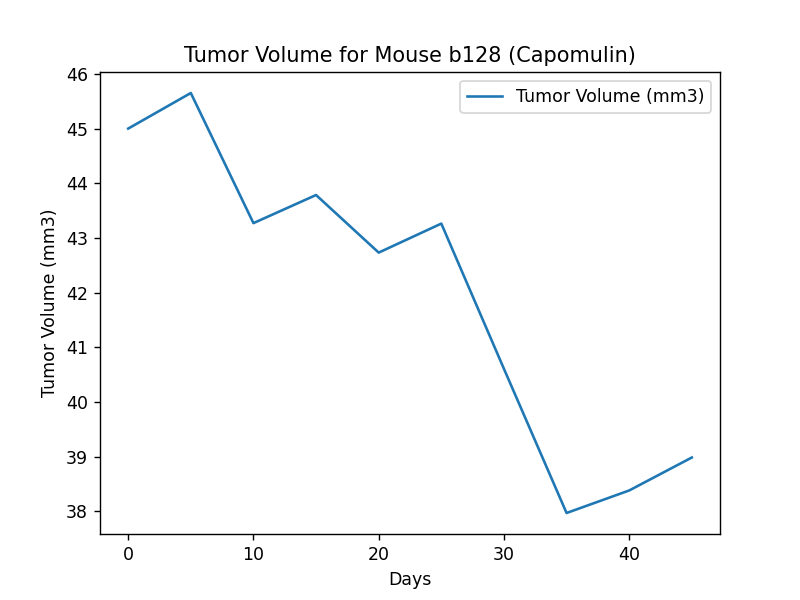

Text(0, 0.5, 'Tumor Volume (mm3)')

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse = mouse_study_clean.loc[mouse_study_clean['Mouse ID']=='b128'].sort_values('Timepoint')

mouse.plot.line(x='Timepoint',
               y='Tumor Volume (mm3)')

plt.title('Tumor Volume for Mouse b128 (Capomulin)')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')


<IPython.core.display.Javascript object>


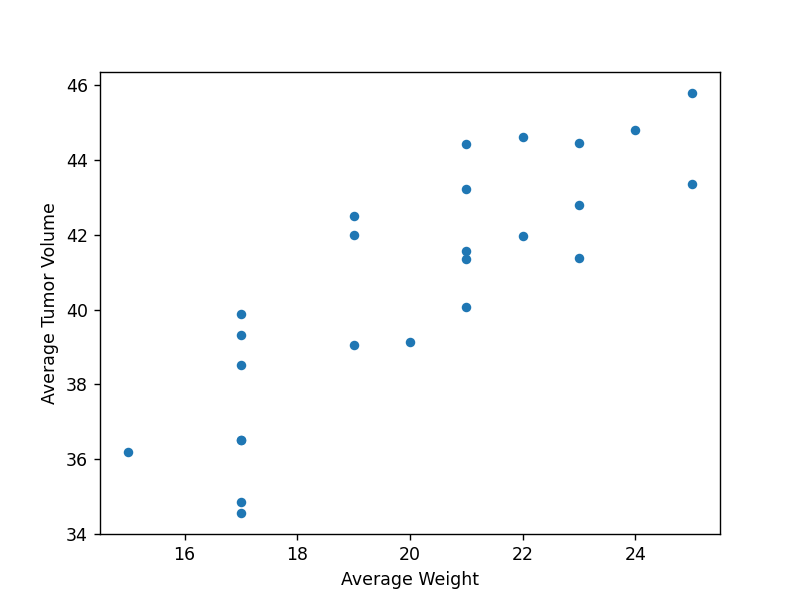

In [172]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#get the mice that with Capomulin drug regimen
cap_mice = mouse_study_clean.loc[(mouse_study_clean['Drug Regimen']=='Capomulin')]

#get the averages for tumor volume and weight
avg_cap_tumor = cap_mice.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
avg_cap_weight = cap_mice.groupby(['Mouse ID'])['Weight (g)'].mean()

#create a data frame 
cap_data = pd.DataFrame({"Average Tumor Volume": avg_cap_tumor,
                        "Average Weight": avg_cap_weight})

#plot 
cap_data.plot(kind = 'scatter', 
              x = 'Average Weight',
             y = 'Average Tumor Volume')

## Correlation and Regression

<IPython.core.display.Javascript object>


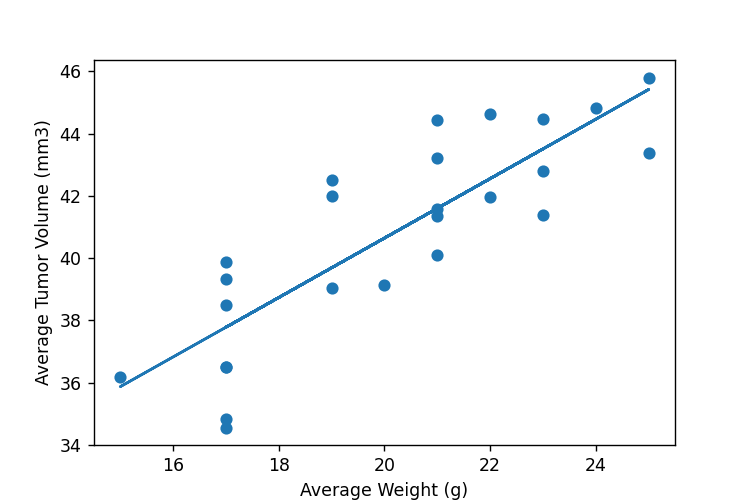

y = 0.95x + 21.55
r-squared=0.7088568047708717


In [174]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = avg_cap_weight
y = avg_cap_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_sq = f'r-squared={(rvalue**2)}'

graph = plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x, regress_values)
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(line_eq)
print(r_sq)